# Customer Churn Analysis

Problem Statement:
    
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

In [1]:
# Importing necesssary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.shape

(7043, 21)

No     5174
Yes    1869
Name: Churn, dtype: int64

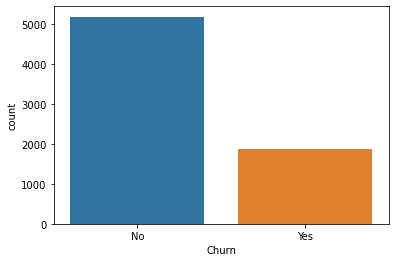

In [5]:
sns.countplot(df.Churn)
df["Churn"].value_counts()

In [6]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,0027-KWYKW,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:>

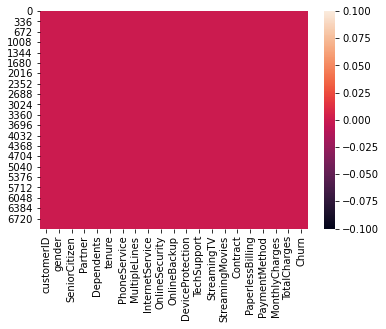

In [8]:
sns.heatmap(df.isnull())
# No Nulls

In [9]:
# Removing Customer ID
df.drop('customerID',axis=1,inplace=True)

<AxesSubplot:xlabel='gender', ylabel='count'>

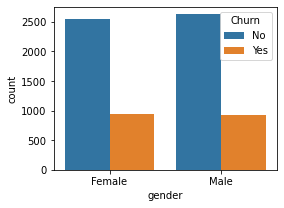

In [10]:
#['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
#       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
#       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
#      'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
#       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Gender wise
plt.figure(figsize=(4,3)) 
sns.countplot('gender',data=df,hue='Churn')

<AxesSubplot:>

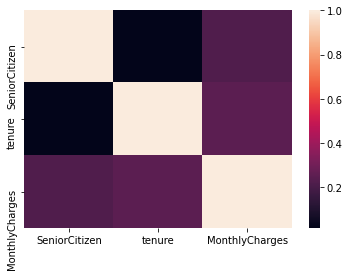

In [11]:
sns.heatmap(df.corr())

In [12]:
#Lets convert "TotalCharges" to float dtype
df["TotalCharges"]=df["TotalCharges"].str.strip()
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])
df["TotalCharges"].fillna(df["TotalCharges"].mean(),inplace=True)

In [13]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

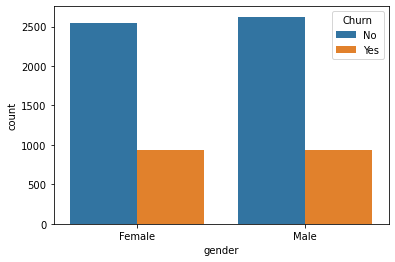

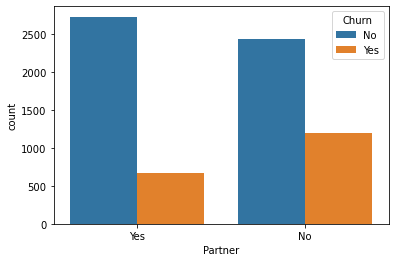

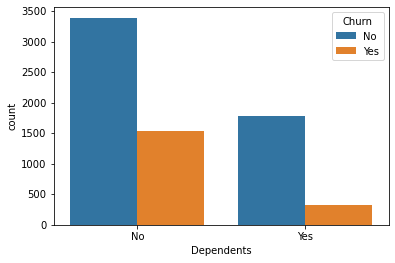

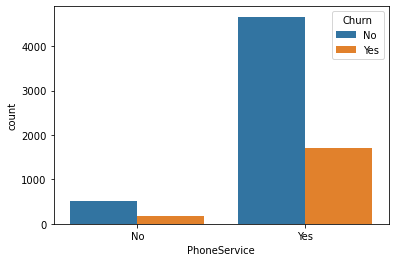

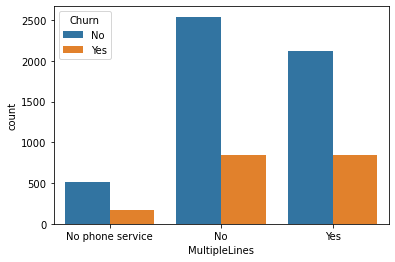

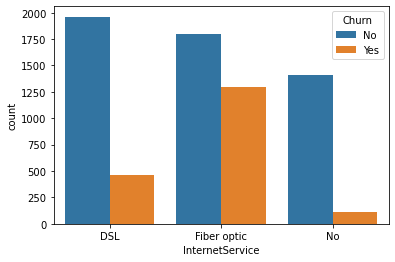

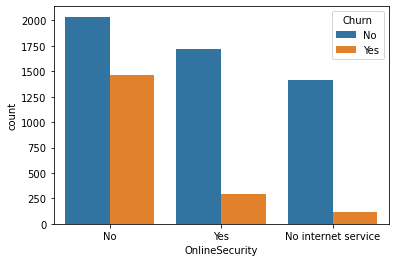

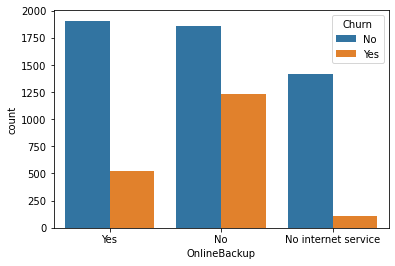

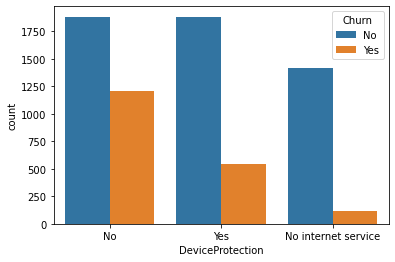

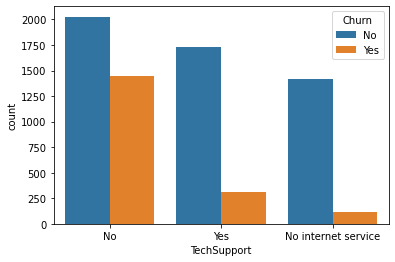

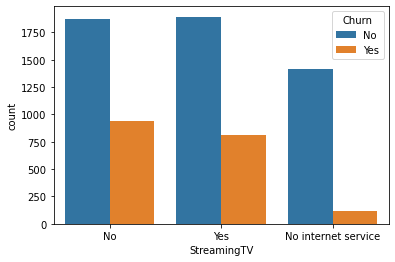

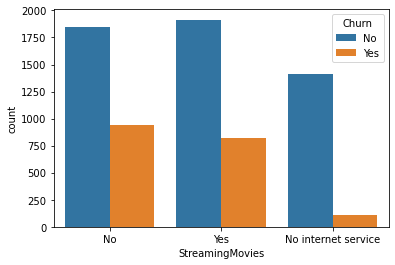

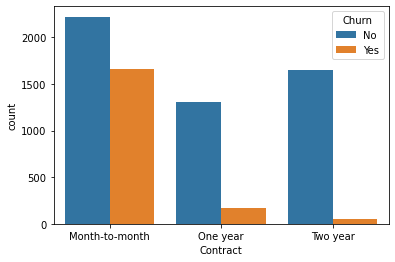

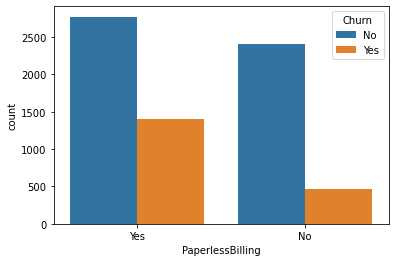

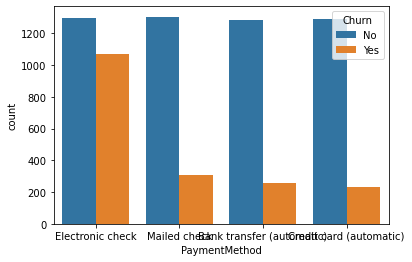

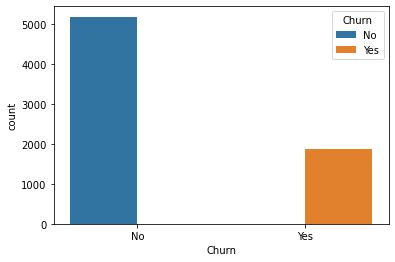

In [14]:

#Lets plot the counts of each column of object datatype
for col in df.columns:
    if df[col].dtype=="object":
        sns.countplot(df[col],hue=df['Churn'])
        plt.show()

In [15]:

df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [16]:
# Let's separate Features and Labels
df_x=df.drop(columns=["Churn"])
y=df[["Churn"]]

In [17]:
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)

In [18]:

# Let's Label ENcode the objects
col=['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
le=LabelEncoder()
df_x[col] = df_x[col].apply(LabelEncoder().fit_transform)

In [19]:
df_x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65


In [20]:
# Let's do Standard Scaling(x)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.994971
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.173876
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-0.960399
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.195400
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-0.941193


In [46]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45,stratify=y)

In [47]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8278, 19), (2070, 19), (8278,), (2070,))

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc


In [49]:
KNN=KNeighborsClassifier()
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=45)
GNB=GaussianNB()
RFC=RandomForestClassifier(random_state=45)
GBC=GradientBoostingClassifier(random_state=45)
ABC=AdaBoostClassifier(random_state=45)
ETC=ExtraTreesClassifier(random_state=45)

In [50]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RFC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))

---------------------> KNeighborsClassifier <----------------------


KNeighborsClassifier()


Accuracy_score =  0.7782608695652173


Cross_Val_Score =  0.7911711004587969


roc_auc_score =  0.7782608695652173


classification_report
               precision    recall  f1-score   support

           0       0.86      0.66      0.75      1035
           1       0.73      0.89      0.80      1035

    accuracy                           0.78      2070
   macro avg       0.79      0.78      0.78      2070
weighted avg       0.79      0.78      0.78      2070



[[685 350]
 [109 926]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



---------------------> SVC <----------------------


SVC()


Accuracy_score =  0.8033816425120773


Cross_Val_Score =  0.8088581466842337


roc_auc_score =  0.8033816425120772


classification_report
               precision    recall  f1-score   support

           0       0.84      0.75      0.79      1035
           1       0.77      0.86      0.81      1035



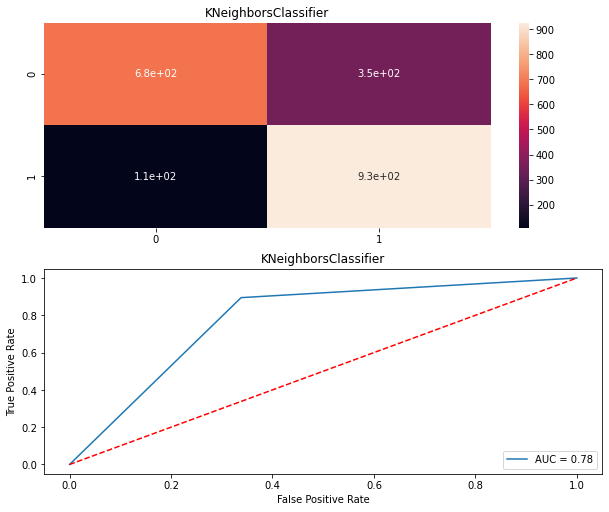

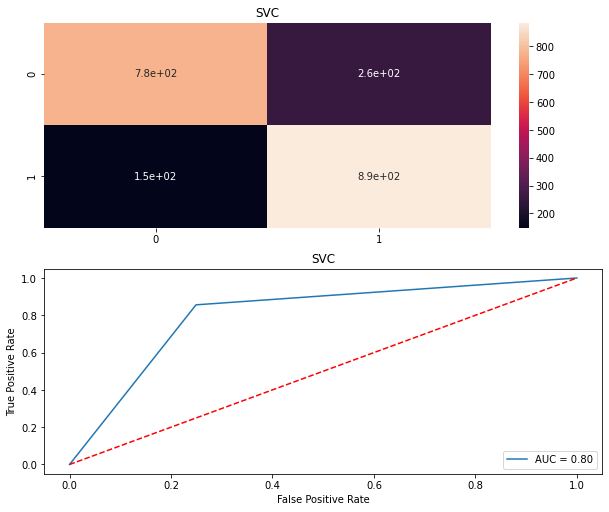

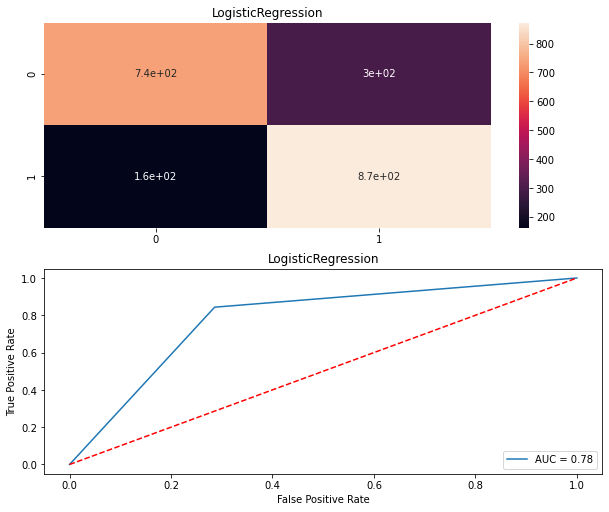

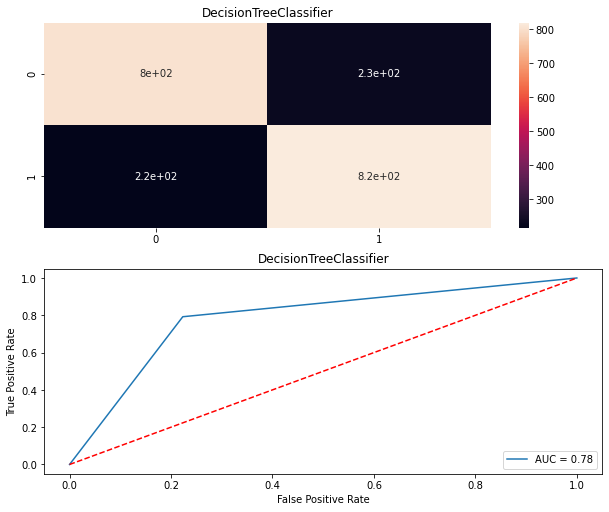

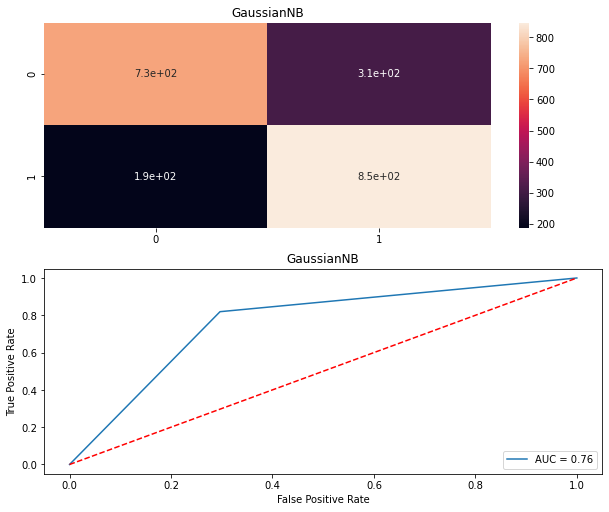

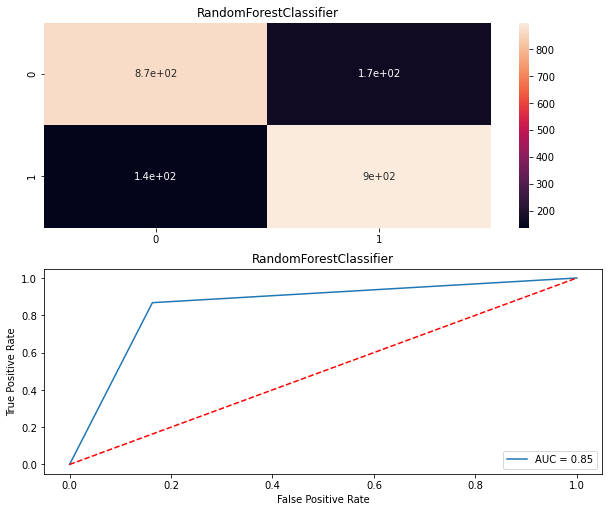

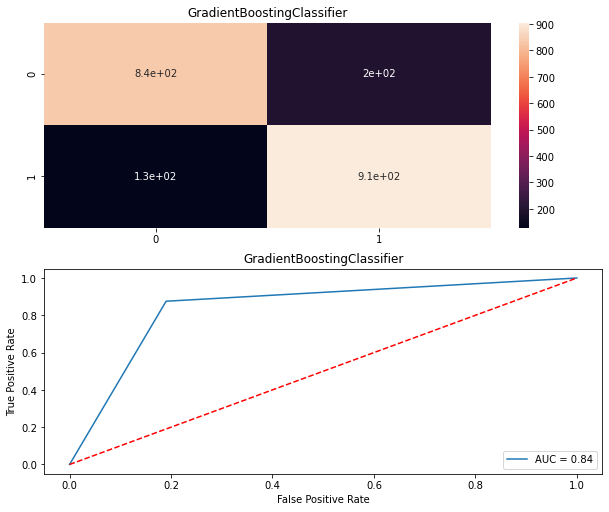

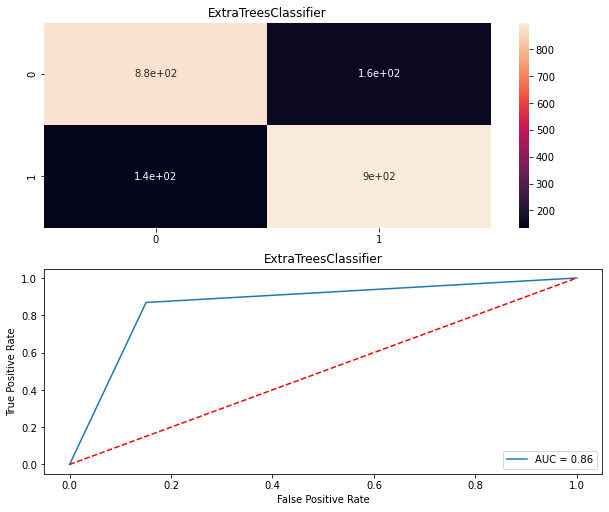

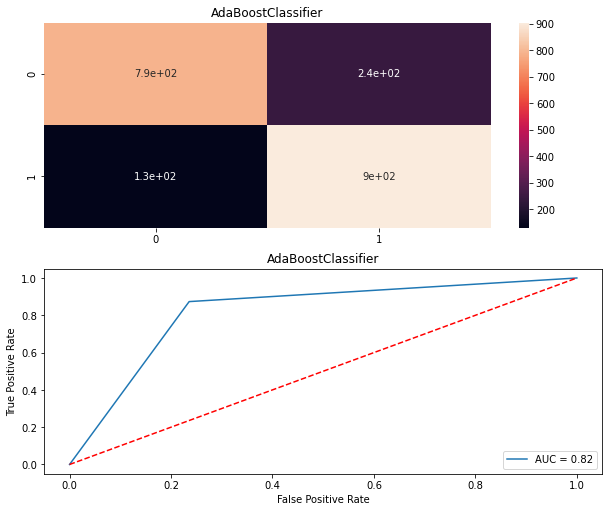

In [51]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('--------------------->',name,'<----------------------')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [52]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,0.778261,0.791171,0.778261
1,SVC,0.803382,0.808858,0.803382
2,LogisticRegression,0.778744,0.776385,0.778744
3,DecisionTreeClassifier,0.784541,0.791370,0.784541
4,GaussianNB,0.761353,0.761889,0.761353
5,RandomForestClassifier,0.852174,0.854764,0.852174
6,GradientBoostingClassifier,0.842512,0.834664,0.842512
7,ExtraTreesClassifier,0.858937,0.872060,0.858937
8,AdaBoostClassifier,0.818841,0.813498,0.818841


# However from the above we can see that the ExtraTreesClassifier is working beter than others, so ExtraTreesClassifier is my final model.

In [53]:
import joblib
joblib.dump(ETC,'Customer_Churn.pkl')

['Customer_Churn.pkl']

In [54]:
model=joblib.load('Customer_Churn.pkl')

In [55]:
prediction=model.predict(x_test)

In [56]:
pre = pd.DataFrame(prediction)
pre.columns = ["prediction"]
pre.to_csv("Customer_Churn_results.csv")